In [3]:
import sys, os
import tomopy
import pydicom
from pydicom.data import get_testdata_files
import numpy as np
import scipy

In [13]:
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
curr_dir = os.getcwd()
data_dir = os.path.join(curr_dir, 'data')
pelvis_dir = os.path.join(data_dir, 'Pelvis')
filename = os.path.join(pelvis_dir, 'vhf.901.dcm')

ds = pydicom.dcmread(filename)

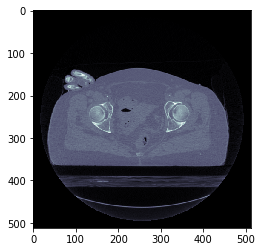

In [15]:
ct_901 = ds.pixel_array
plt.imshow(ct_901, cmap = plt.cm.bone)

In [24]:
from skimage.transform import radon, rescale

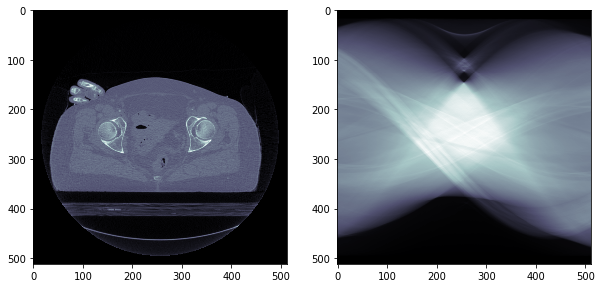

In [27]:
theta = np.linspace(0,180,512,endpoint=False) # viewpoints
sin_901 = radon(ct_901, theta=theta, circle=True)
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(ct_901,cmap = plt.cm.bone)
plt.subplot(122)
plt.imshow(sin_901,cmap = plt.cm.bone)

In [28]:
noisy_dir = os.path.join(data_dir, 'S70')
dirty_name = os.path.join(noisy_dir, 'IM0001S0')

ds_s = pydicom.dcmread(dirty_name)

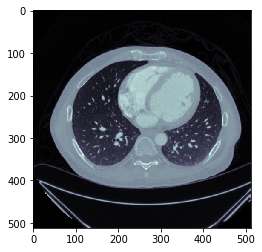

In [31]:
ct_0001 = ds_s.pixel_array
plt.imshow(ct_0001, cmap = plt.cm.bone)